# Probabilidade, Método de Monte Carlo (MCM) e Amostragem por Hipercubo Latino (LHS)

In [5]:

import numpy as np
from scipy.stats import qmc
from scipy.stats import norm
from scipy.stats import betabinom
import matplotlib.pyplot as plt

n_amostras = 1000
# Como queremos apenas uma lista de números, teremos 1 dimensão.
n_dimensoes = 1 
# Usar uma semente (seed) torna a geração de números "aleatórios" reproduzível.
# Remova ou altere o valor para obter uma nova sequência de números a cada execução.
seed = 42


Formato da amostra unitária (LHS): (1000, 1)
As 5 primeiras amostras no intervalo [0, 1]:
 [0.56322604 0.99656112 0.6961414  0.94130263 0.33290582]
Gerando 1000 números de uma Distribuição Binomial(n=20, p=0.25)

As 10 primeiras amostras convertidas para a Distribuição Binomial:
 [ 5. 11.  6.  8.  4.  6.  1.  5.  7.  4.]


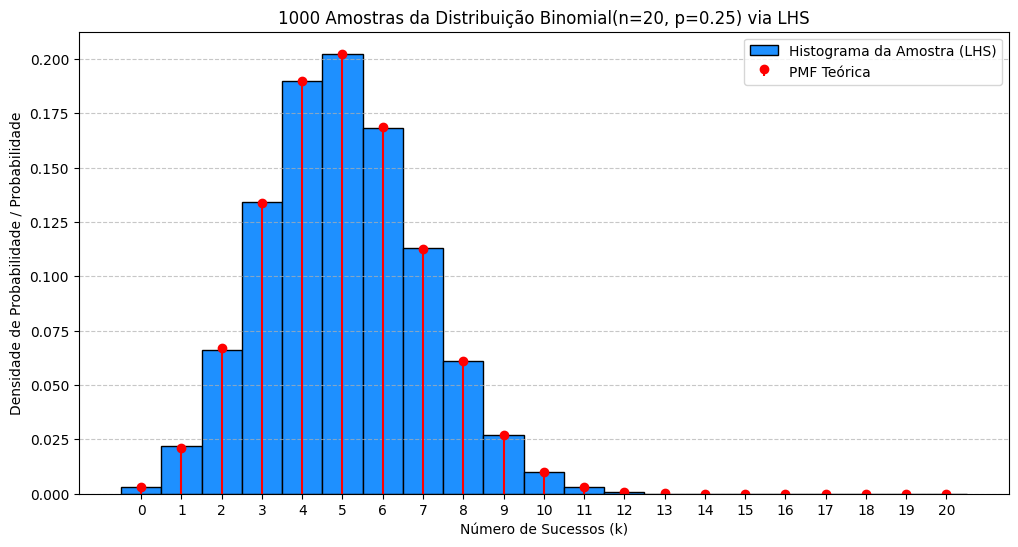

In [7]:
# Inicializa o amostrador de Hipercubo Latino (LHS)
# d: número de dimensões
sampler = qmc.LatinHypercube(d=n_dimensoes, seed=seed)

# Gera n_amostras pontos uniformemente distribuídos no intervalo [0, 1]
# O resultado terá o formato (n_amostras, n_dimensoes)
amostra_unitaria = sampler.random(n=n_amostras)

print(f"\nFormato da amostra unitária (LHS): {amostra_unitaria.shape}")
print("As 5 primeiras amostras no intervalo [0, 1]:\n", amostra_unitaria[:5].flatten())


import numpy as np
from scipy.stats import qmc
from scipy.stats import binom # Importamos a distribuição Binomial
import matplotlib.pyplot as plt

# --- 1. Definição dos Parâmetros ---

n_amostras = 1000
n_dimensoes = 1 
seed = 42

# Parâmetros para a Distribuição Binomial
n_ensaios = 20        # (n) Número de vezes que o experimento é repetido (ex: 20 lançamentos de moeda)
prob_sucesso = 0.25   # (p) Probabilidade de sucesso em cada ensaio

print(f"Gerando {n_amostras} números de uma Distribuição Binomial(n={n_ensaios}, p={prob_sucesso})")

# --- 2. Gerar Amostras no Hipercubo Unitário [0, 1] (Etapa idêntica) ---

sampler = qmc.LatinHypercube(d=n_dimensoes, seed=seed)
amostra_unitaria = sampler.random(n=n_amostras)


# --- 3. Transformar para a Distribuição Binomial ---

# Usamos a ppf da binomial com os três parâmetros: q, n, p
# O resultado será um array de números inteiros entre 0 e 20.
amostra_binomial = binom.ppf(amostra_unitaria, n=n_ensaios, p=prob_sucesso)

print("\nAs 10 primeiras amostras convertidas para a Distribuição Binomial:\n", amostra_binomial[:10].flatten())


# --- 4. Visualização dos Resultados ---

# Para uma distribuição discreta, um histograma com barras centradas nos inteiros é ideal
plt.figure(figsize=(12, 6))
# Definimos os limites dos bins para que cada barra represente um número inteiro
bins = np.arange(0, n_ensaios + 2) - 0.5
plt.hist(amostra_binomial, bins=bins, density=True, color='dodgerblue', edgecolor='black', label='Histograma da Amostra (LHS)')

# Sobrepor a Função de Massa de Probabilidade (PMF) teórica
# A PMF dá a probabilidade exata de cada resultado inteiro
k_valores = np.arange(0, n_ensaios + 1)
pmf_teorica = binom.pmf(k_valores, n=n_ensaios, p=prob_sucesso)
# Usamos 'stem' para um gráfico de "pirulito", ideal para PMFs
plt.stem(k_valores, pmf_teorica, 'r', markerfmt='ro', linefmt='r-', basefmt=' ', label='PMF Teórica')

plt.title(f'1000 Amostras da Distribuição Binomial(n={n_ensaios}, p={prob_sucesso}) via LHS')
plt.xlabel('Número de Sucessos (k)')
plt.ylabel('Densidade de Probabilidade / Probabilidade')
plt.xticks(k_valores) # Garante que o eixo x mostre apenas os inteiros
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()